<a href="https://colab.research.google.com/github/Darius2527/ChurnModelling-Classification/blob/main/ChurnModellingProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#LOADING THE DATASET
import pandas as pd
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
df.shape

(10000, 14)

In [3]:
df.isnull().sum()
#no null values present

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
#lets drop unnecessary columns
df=df.drop(columns=['RowNumber','CustomerId','Surname'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#let us create dummy variables for Geography and Gender columns
df=pd.get_dummies(data=df,drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [6]:
df["Geography_Germany"] = df["Geography_Germany"].astype(int)
df["Geography_Spain"] = df["Geography_Spain"].astype(int)
df["Gender_Male"]=df["Gender_Male"].astype(int)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [7]:
df["Exited"].value_counts()
#we can see that the data is inbalanced

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: >

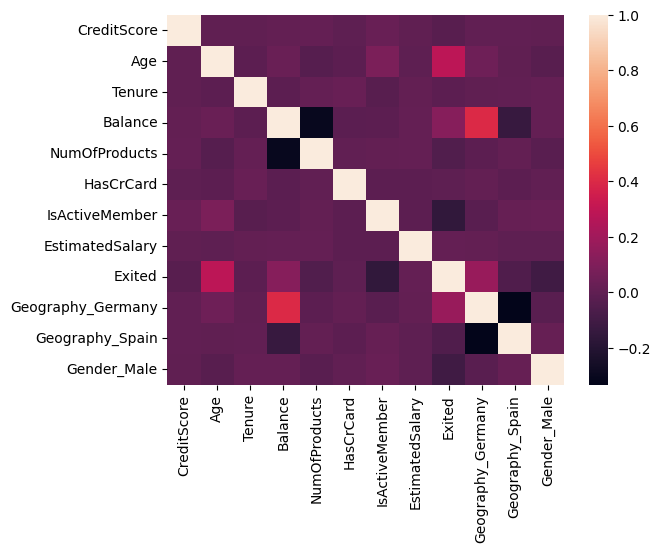

In [8]:
import seaborn as sns
sns.heatmap(df.corr())
#as we can see that there are no features that are highly positively correlated, we will not drop any columns

In [9]:
#extracting features and target
X=df.drop(columns=["Exited"])
Y=df["Exited"]

In [10]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [11]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [12]:
#splitting dataset into training and test data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(8000, 11) (8000,)
(2000, 11) (2000,)


In [13]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(X_train)
sc.transform(X_test)

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [14]:
model_accuracy={}
roc_score={}


In [15]:
#Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
parameters={'penalty':['l1','l2','elastic',None],
            'C':[0.01,0.05,0.1,0.5,1],
            'tol':[1e-5,1e-4,1e-3,1e-2],
            }
clf=GridSearchCV(LogisticRegression(),parameters,cv=5)
clf.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1],
                         'penalty': ['l1', 'l2', 'elastic', None],
                         'tol': [1e-05, 0.0001, 0.001, 0.01]})

In [16]:
clf.cv_results_

{'mean_fit_time': array([0.00238428, 0.00191374, 0.00183492, 0.00178685, 0.09552236,
        0.09367952, 0.11131091, 0.10756159, 0.0028357 , 0.0035172 ,
        0.00198088, 0.00182114, 0.10209503, 0.10669122, 0.07069278,
        0.04508715, 0.00194931, 0.00251226, 0.00196586, 0.00344329,
        0.04616098, 0.04358826, 0.04506731, 0.04570279, 0.00222263,
        0.00193496, 0.00179648, 0.00172224, 0.04386101, 0.04540167,
        0.04281678, 0.04771962, 0.00223899, 0.0018055 , 0.00176816,
        0.00176821, 0.04253163, 0.04648199, 0.04406915, 0.0457263 ,
        0.00229192, 0.00219169, 0.00226426, 0.00276303, 0.04362116,
        0.04643517, 0.04646602, 0.04919324, 0.0018836 , 0.00183563,
        0.00296764, 0.00180354, 0.04525833, 0.04815564, 0.04531684,
        0.04920325, 0.00198817, 0.00174775, 0.00172687, 0.0017355 ,
        0.04383993, 0.04485898, 0.04428687, 0.0514029 , 0.00183592,
        0.00175972, 0.0017458 , 0.00182419, 0.0461401 , 0.05428123,
        0.04215164, 0.04773765,

In [17]:
#checking best parameter
best_params=clf.best_params_
best_params

{'C': 0.01, 'penalty': 'l2', 'tol': 1e-05}

In [18]:
#creating model with best parameters
model_LR=clf.best_estimator_
model_LR.get_params()

{'C': 0.01,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 1e-05,
 'verbose': 0,
 'warm_start': False}

In [19]:
#predicting output for test data
Y_pred=model_LR.predict(X_test)

In [20]:
#checking performance metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
accuracy_LR=accuracy_score(Y_test,Y_pred)
rocscore_LR=roc_auc_score(Y_test,Y_pred)
model_accuracy["Logistic Regression"]=accuracy_LR
roc_score["Logistic Regression"]=rocscore_LR
print(accuracy_LR)
print(rocscore_LR)
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))


0.789
0.5176980533302372
[[1553   42]
 [ 380   25]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1595
           1       0.37      0.06      0.11       405

    accuracy                           0.79      2000
   macro avg       0.59      0.52      0.49      2000
weighted avg       0.72      0.79      0.72      2000



In [ ]:
#SVM Classifier
from sklearn.svm import SVC
parameters={'C':[0.1,0.5,1],
            'kernel':['linear','poly','rbf']}
clf=GridSearchCV(SVC(),parameters,cv=5)
clf.fit(X_train,Y_train)


In [ ]:
clf.cv_results_

In [ ]:
best_params=clf.best_params_
best_params

In [ ]:
model_SVC=clf.best_estimator_
model_SVC.get_params()

In [ ]:
Y_pred=model_SVC.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
accuracy_SVM=accuracy_score(Y_test,Y_pred)
rocscore_SVM=roc_auc_score(Y_test,Y_pred)
model_accuracy["SVM classifier"]=accuracy_SVM
roc_score["SVM classifier"]=rocscore_SVM
print(accuracy_SVM)
print(rocscore_SVM)
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))


In [21]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
parameters={'n_neighbors':[3,5,7,9,11],
            'p':[1,2],
            'leaf_size':[10,20,30],
            'weights':['uniform','auto'],}
clf=GridSearchCV(KNeighborsClassifier(),parameters,cv=5)
clf.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 213, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/s

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [10, 20, 30],
                         'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'auto']})

In [22]:
clf.cv_results_

{'mean_fit_time': array([0.01334414, 0.00128312, 0.0190021 , 0.00183735, 0.02375317,
        0.00178041, 0.0236989 , 0.00203476, 0.02234297, 0.0020968 ,
        0.01890774, 0.0012691 , 0.01296344, 0.00129337, 0.01381631,
        0.00120492, 0.01702375, 0.00191216, 0.02317519, 0.00180039,
        0.02078338, 0.00204711, 0.02045755, 0.00187488, 0.01688075,
        0.00119061, 0.01213207, 0.00124083, 0.01194334, 0.00122986,
        0.01263127, 0.00118952, 0.01173449, 0.00169139, 0.0118413 ,
        0.00127215, 0.01256132, 0.00124397, 0.01178017, 0.00134592,
        0.01172342, 0.00164938, 0.01109667, 0.00128126, 0.01114058,
        0.00127912, 0.01228695, 0.00125351, 0.01068683, 0.00123563,
        0.01092525, 0.00223765, 0.01202316, 0.0012702 , 0.01081767,
        0.00118389, 0.01421137, 0.00123544, 0.01082277, 0.00234475]),
 'std_fit_time': array([4.81984598e-04, 1.04642933e-04, 4.43019856e-03, 1.26798039e-04,
        2.03999639e-03, 1.56580908e-04, 1.47947971e-03, 1.53716843e-04,
     

In [23]:
best_params=clf.best_params_
best_params

{'leaf_size': 10, 'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}

In [24]:
model_KNN=clf.best_estimator_
model_KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 10,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 11,
 'p': 2,
 'weights': 'uniform'}

In [25]:
Y_pred=model_KNN.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
accuracy_KNN=accuracy_score(Y_test,Y_pred)
rocscore_KNN=roc_auc_score(Y_test,Y_pred)
model_accuracy["KNN"]=accuracy_KNN
roc_score["KNN"]=rocscore_KNN
print(accuracy_KNN)
print(rocscore_KNN)
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))


0.79
0.5072719532489648
[[1567   28]
 [ 392   13]]
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1595
           1       0.32      0.03      0.06       405

    accuracy                           0.79      2000
   macro avg       0.56      0.51      0.47      2000
weighted avg       0.70      0.79      0.72      2000



In [27]:
#Naive Bayes Classifier
#no hyperparameter tuning as naive bayes does not have any hyperparameters to tune
#let us apply K fold cross validation for this model
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
accuracy_NB=cross_val_score(NB,X,Y,cv=5,scoring='accuracy').mean()
rocscore_NB=cross_val_score(NB,X,Y,cv=5,scoring='roc_auc').mean()
model_accuracy["Naive Bayes Classifier"]=accuracy_NB
roc_score["Naive_Bayes_classifier"]=rocscore_NB
print(accuracy_NB)
print(rocscore_NB)

0.7847000000000001
0.7445921950423365


In [28]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
parameters={'n_estimators':[50,100,250,500],
            'criterion':['gini','entropy'],
            'max_depth':[2,3,4,None]}
clf=GridSearchCV(RandomForestClassifier(),parameters,cv=5)
clf.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, None],
                         'n_estimators': [50, 100, 250, 500]})

In [30]:
clf.cv_results_

{'mean_fit_time': array([0.25918703, 0.38312998, 0.82908278, 1.8318357 , 0.19654155,
        0.3886765 , 0.9568553 , 2.11210523, 0.22660332, 0.53247252,
        1.23223853, 2.45835018, 0.47338924, 1.11027479, 2.5577064 ,
        5.38693905, 0.17377019, 0.34877958, 0.89652371, 1.95265837,
        0.21490116, 0.41983576, 1.27213984, 2.31877112, 0.25298018,
        0.48964319, 1.33781476, 2.71113186, 0.58915734, 1.09992633,
        2.92478046, 6.86974502]),
 'std_fit_time': array([0.01145288, 0.06354881, 0.00714218, 0.32318127, 0.00483706,
        0.00785438, 0.0049416 , 0.34344275, 0.00470025, 0.11021429,
        0.20180327, 0.34468611, 0.00786041, 0.20291837, 0.3283347 ,
        0.50417574, 0.00902482, 0.00669699, 0.00786129, 0.37372419,
        0.00669747, 0.00691315, 0.27099209, 0.29424012, 0.01452473,
        0.01157749, 0.20982287, 0.31800675, 0.09556495, 0.01532487,
        0.26570579, 0.98705466]),
 'mean_score_time': array([0.01403246, 0.02033067, 0.03978128, 0.07881556, 0.010721

In [31]:
best_params=clf.best_params_
best_params

{'criterion': 'gini', 'max_depth': None, 'n_estimators': 250}

In [32]:
model_RF=clf.best_estimator_
model_RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 250,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [33]:
Y_pred=model_RF.predict(X_test)

In [34]:
accuracy_RF=accuracy_score(Y_test,Y_pred)
rocscore_RF=roc_auc_score(Y_test,Y_pred)
model_accuracy["Random Forest"]=accuracy_RF
roc_score["Random Forest"]=rocscore_RF
print(accuracy_RF)
print(rocscore_RF)
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

0.868
0.7385502534927822
[[1525   70]
 [ 194  211]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1595
           1       0.75      0.52      0.62       405

    accuracy                           0.87      2000
   macro avg       0.82      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000



In [35]:
#AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
parameters={'n_estimators':[50,100,250,500],
            'learning_rate':[0.1,0.25,0.5,0.75,1]}
clf=GridSearchCV(AdaBoostClassifier(),parameters,cv=5)
clf.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.25, 0.5, 0.75, 1],
                         'n_estimators': [50, 100, 250, 500]})

In [36]:
clf.cv_results_

{'mean_fit_time': array([0.36107488, 0.8189208 , 1.74149394, 3.71624975, 0.33144889,
        0.67256722, 1.84227295, 3.4727634 , 0.33866005, 0.87055845,
        1.66075511, 3.90658407, 0.33873549, 0.66569195, 1.84921803,
        3.59542203, 0.45270748, 0.6647305 , 1.82722521, 3.49690876]),
 'std_fit_time': array([0.02206254, 0.13456592, 0.10750311, 0.37344223, 0.00588722,
        0.00260797, 0.27341199, 0.36515043, 0.00460837, 0.10483799,
        0.01046603, 0.43704044, 0.00478313, 0.00887848, 0.21217941,
        0.40061256, 0.05605297, 0.00750288, 0.22972672, 0.25930915]),
 'mean_score_time': array([0.02188969, 0.05122151, 0.08807411, 0.18975916, 0.02017713,
        0.03842964, 0.10772099, 0.17436676, 0.01970615, 0.04910231,
        0.08607244, 0.19288297, 0.01991   , 0.03848686, 0.09786854,
        0.18186884, 0.02589369, 0.03721671, 0.09715466, 0.18576365]),
 'std_score_time': array([0.00121319, 0.01020419, 0.00597694, 0.030761  , 0.00156404,
        0.00352869, 0.0191228 , 0.005923

In [37]:
best_params=clf.best_params_
best_params

{'learning_rate': 0.1, 'n_estimators': 250}

In [38]:
model_adaboost=clf.best_estimator_
model_adaboost.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 0.1,
 'n_estimators': 250,
 'random_state': None}

In [39]:
Y_pred=model_adaboost.predict(X_test)

In [40]:
accuracy_adaboost=accuracy_score(Y_test,Y_pred)
rocscore_adaboost=roc_auc_score(Y_test,Y_pred)
model_accuracy["AdaBoost"]=accuracy_adaboost
roc_score["AdaBoost"]=rocscore_adaboost
print(accuracy_adaboost)
print(rocscore_adaboost)
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

0.867
0.735160029412903
[[1526   69]
 [ 197  208]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1595
           1       0.75      0.51      0.61       405

    accuracy                           0.87      2000
   macro avg       0.82      0.74      0.76      2000
weighted avg       0.86      0.87      0.86      2000



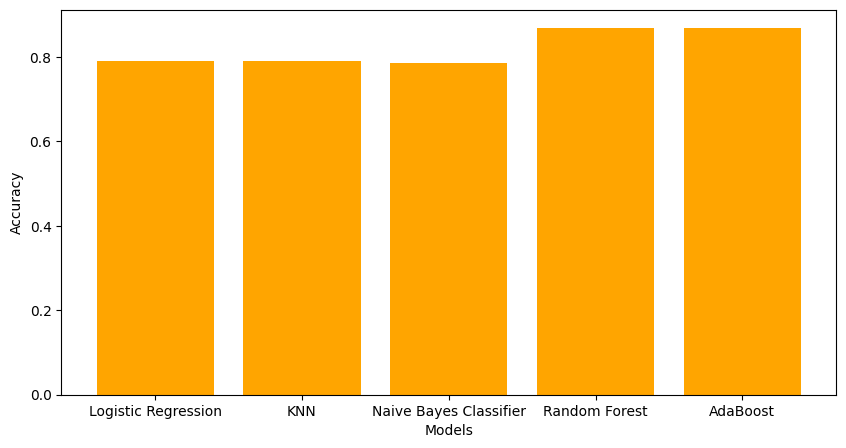

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(model_accuracy.keys(),model_accuracy.values(),label="accuracy",color='orange')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()

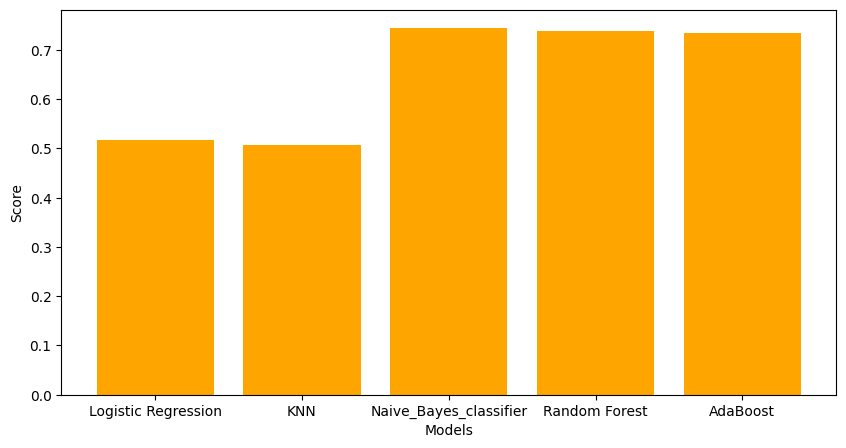

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.bar(roc_score.keys(),roc_score.values(),label="ROC score",color='orange')
plt.xlabel("Models")
plt.ylabel("Score")
plt.show()

In [ ]:
#AdaBoost has highest accuracy
#Naive Bayes has highest ROC
#accuracy can be improved if we obtain a balanced dataset using sampling techniques
#accuracy can be improved by applying hyperparameter tuning across more alues for hyperparameters